# 가위 바위 보 분류기 만들기

In [1]:
# 필요한 모듈 불러오기
from PIL import Image
import glob
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# 파일 모두 28x28 사이즈로 바꾸어 저장하는 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [3]:
# 가위 바위 보 각각의 디렉터리에 들어있는 이미지들의 사이즈를 조절
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [4]:
def load_data(img_path, number_of_data=300):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


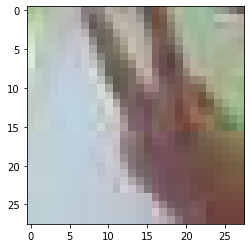

In [5]:
# 이미지 불러보기
plt.imshow(x_train[50])
print('라벨: ', y_train[50])

In [17]:
# Hyper parameter
n_channel_1=256
n_channel_2=500
n_dense=100
n_train_epoch=100

# 딥러닝 네트워크 모델 설계
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 256)       7168      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 500)       1152500   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 500)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12500)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               1250100   
_________________________________________________________________
dense_9 (Dense)              (

In [21]:
# 모델 학습시키기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 1.6578 - accuracy: 0.7433
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0908 - accuracy: 0.9700
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2169 - accuracy: 0.8900
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0228 - accuracy: 0.9933
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 6.4123e-04 - accuracy: 1.0000
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 3.6632e-04 - accuracy: 1.0000
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 1.7643e-04 - accuracy: 1.0000
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 1.3876e-04 - accuracy

In [19]:
# 테스트용 데이터 만들기

# 테스트 이미지 사이즈 조절
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

# x_test, y_test 만들기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.


In [23]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.0688 - accuracy: 0.7767
test_loss: 1.0688430070877075 
test_accuracy: 0.7766666412353516


## 회고
첫번째 exploration, 가위 바위 보 분류하기였다.
여기서 루브릭 평가 지표로 있었던 train accuracy 60% 이상을 맞춰줘야 하는게 제일 어려웠고 시간이 많이 들어갔다.
accuracy를 올려주기 위해 하이퍼 파라메터의 값들을 여러가지로 수정해봤고, 그 중 가장 잘 나온 것이 지금의 상태이다.
그리고 또 훈련을 위한 이미지가 문제인가 싶어 훈련이 잘 되도록 손 뒤의 배경을 가려서 찍어 다시 시도해보기도 했다. 이 방법을 시도하니 그래도 accuracy가 어느정도 상승하는걸 볼 수 있었다.
조원들과 같이 생각해본 결과 이미지 크기를 28x28로 줄인 것과, 가위 바위 보 각 데이터 개수를 100개로 한정해놓은게 accuracy 값이 잘 나오지 않는 이유가 되지 않을까 싶었다. 이미지 크기의 경우 그만큼 판단해야할 픽셀이 줄어드는 것 때문이고, 데이터 개수도 100개로는 너무 적은 것 같았다.
또, 다른 조원들의 사진을 받아와서 테스트 이미지로 사용한 부분도 문제가 되었을 것이라 생각했다. 다른 조원들의 사진과 내 사진은 배경이나 명도 같은 차이들이 있고, 이게 accuracy에 영향을 줬을 것이라 생각하여, 테스트 이미지 또한 내가 또 다시 만든 이미지를 사용해보았다. 이 결과 역시 accuracy가 어느정도 상승하는 것 처럼 보였다.
그 결과 위처럼 0.7767, 약 78%를 달성했다!